In [ ]:
13. DECISION TREE

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# Load dataset
df = pd.read_excel("heart_disease.xlsx")

# Display basic info
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
print(df.info())
display(df.head())

Shape of dataset: (12, 2)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes
None


,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...



Missing values per column:
 age             0
Age in years    0
dtype: int64


C:\Users\Alpha\AppData\Local\Temp\ipykernel_12508\1425436583.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


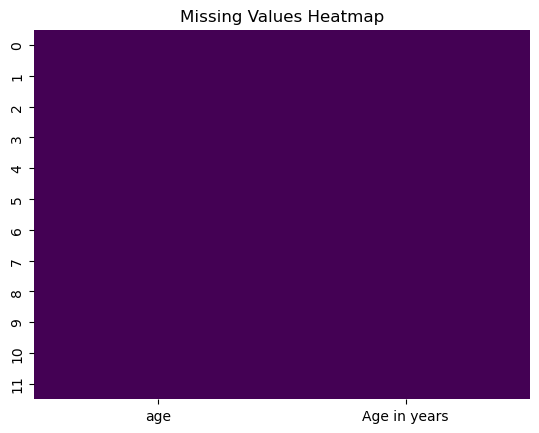

In [13]:
# 2. EXPLORATORY DATA ANALYSIS (EDA)
# Convert numeric-looking columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Missing values
print("\nMissing values per column:\n", df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [14]:
print("\nDuplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicate Rows: 0


In [15]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print("\nNumeric Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))


Numeric Columns: []
Categorical Columns: ['age', 'Age in years']


In [16]:
display(df.describe())

,age,Age in years
count,12,12
unique,12,12
top,Gender,"Gender ; Male - 1, Female -0"
freq,1,1


In [17]:
if len(num_cols) > 0:
    df[num_cols].hist(figsize=(12,10), bins=20)
    plt.suptitle("Histograms of Numerical Features")
    plt.show()
else:
    print("No numeric columns found for histogram plotting.")


No numeric columns found for histogram plotting.


In [19]:
if len(num_cols) > 0:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df[num_cols])
    plt.title("Boxplots for Outlier Detection")
    plt.show()

In [20]:
if len(num_cols) > 1:
    corr = df.corr(numeric_only=True)
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

In [22]:
# 3. FEATURE ENGINEERING
df = df.fillna(df.mean(numeric_only=True))

# Detect categorical and numerical columns automatically
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Encode categorical columns
if len(cat_cols) > 0:
    le = LabelEncoder()
    for col in cat_cols:
        df[col] = le.fit_transform(df[col].astype(str))

# Scale only if there are numeric columns
if len(num_cols) > 0:
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
else:
    print("⚠️ No numeric columns found to scale.")



--- Decision Tree Regressor Performance ---
MAE: 1.1587309190046424
MSE: 1.3426573426573427
R² Score: -0.1428571428571428


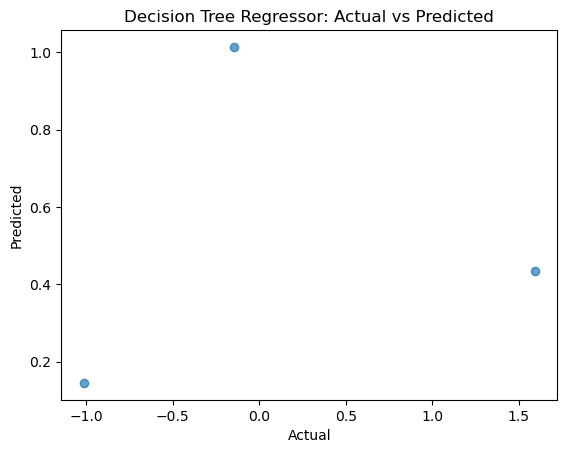

In [29]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train regression model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluation
print("\n--- Decision Tree Regressor Performance ---")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plot predictions vs actual
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree Regressor: Actual vs Predicted")
plt.show()


Fitting 5 folds for each of 576 candidates, totalling 2880 fits

Best Parameters Found:
{'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

--- Tuned Decision Tree Regressor Performance ---
MAE: 0.7242068243779015
MSE: 0.665889665889666
R² Score: 0.43320105820105814


C:\Users\Alpha\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan 

<function matplotlib.pyplot.show(close=None, block=None)>

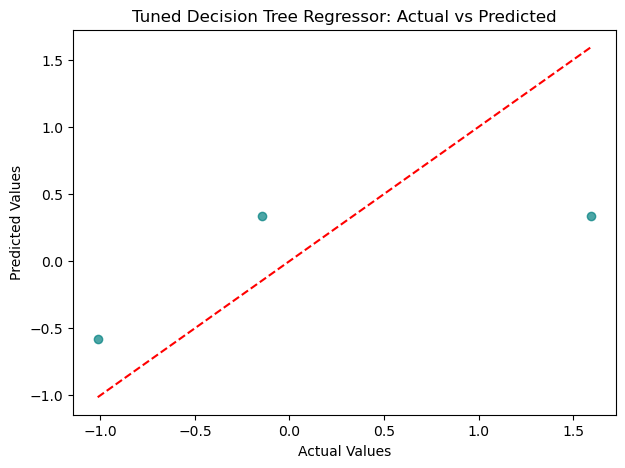

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- Step 1: Define base model ---
dt = DecisionTreeRegressor(random_state=42)

# --- Step 2: Define parameter grid ---
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, 12, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6]
}

# --- Step 3: Perform Grid Search ---
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='r2',         # use R² as the evaluation metric
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1,            # use all CPU cores
    verbose=1
)

grid_search.fit(X_train, y_train)

# --- Step 4: Print best parameters ---
print("\nBest Parameters Found:")
print(grid_search.best_params_)

# --- Step 5: Evaluate tuned model ---
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\n--- Tuned Decision Tree Regressor Performance ---")
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("R² Score:", r2_score(y_test, y_pred_best))

# --- Step 6: Plot Predictions vs Actual ---
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_best, color='teal', alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Tuned Decision Tree Regressor: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show



--- Decision Tree Regressor Performance ---
Mean Absolute Error (MAE): 0.7242068243779015
Mean Squared Error (MSE): 0.665889665889666
R² Score: 0.43320105820105814


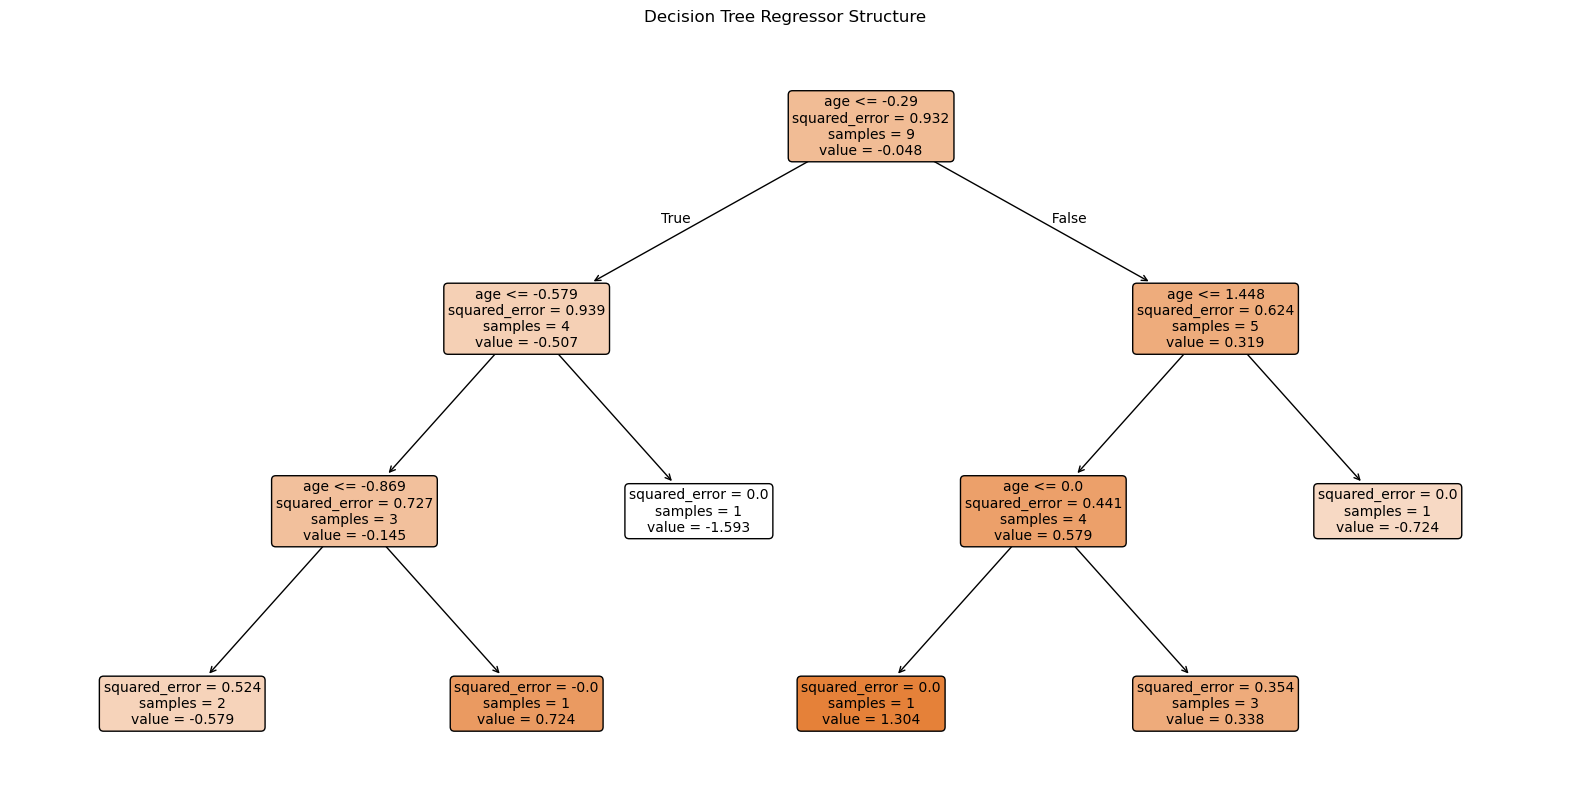

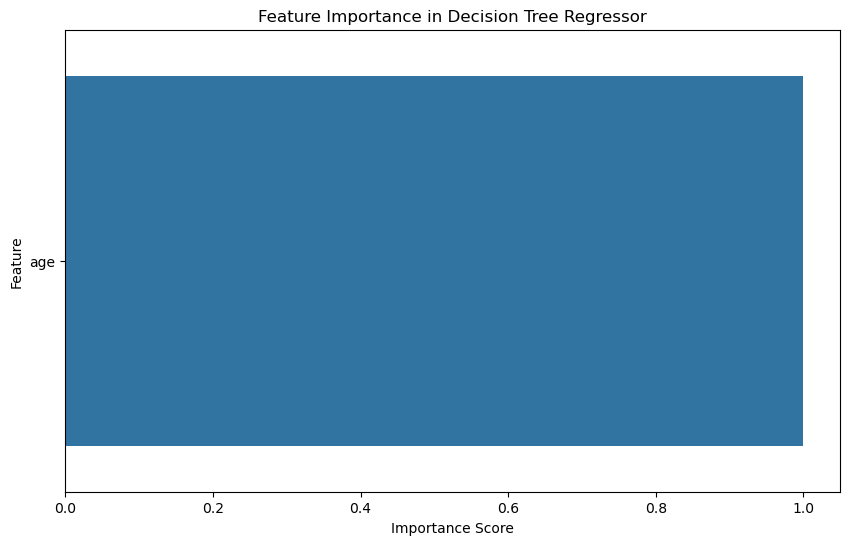

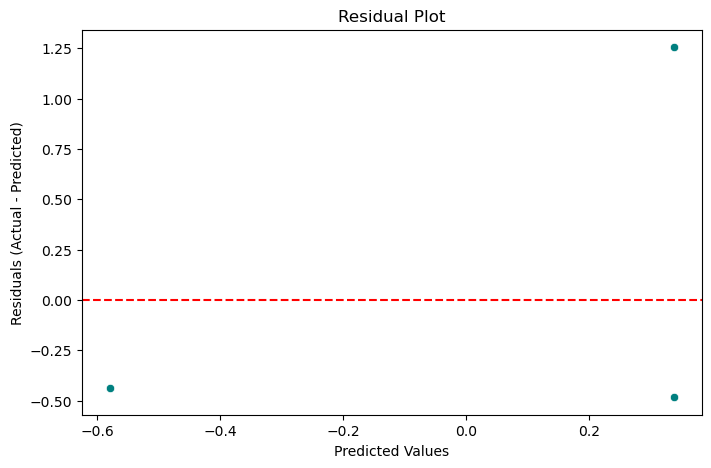


 Model Evaluation and Analysis Completed Successfully!


In [39]:
# --- Step 1: Evaluate model performance ---
print("\n--- Decision Tree Regressor Performance ---")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_best))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_best))
print("R² Score:", r2_score(y_test, y_pred_best))

# --- Step 2: Visualize the decision tree structure ---
plt.figure(figsize=(20,10))
plot_tree(
    best_model,
    filled=True,
    feature_names=X_train.columns,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Regressor Structure")
plt.show()

# --- Step 3: Feature importance analysis (fixed for Seaborn 0.14) ---
importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index, hue=importances.index, legend=False)
plt.title("Feature Importance in Decision Tree Regressor")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# --- Step 4: Residual plot to check prediction errors ---
residuals = y_test - y_pred_best
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_best, y=residuals, color='teal')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

print("\n Model Evaluation and Analysis Completed Successfully!")


In [ ]:
Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Ans:  Decision Tree models have several hyperparameters that control their complexity and performance. One of the
most important is max_depth, which sets how deep the tree can grow. A smaller depth prevents overfitting by keeping
the model simple, while a larger depth allows the tree to capture more detail but risks fitting noise in the data. 
Similarly, min_samples_split defines the minimum number of samples needed to split a node; increasing this value
makes the model simpler, while decreasing it allows more splits and can lead to overfitting. The min_samples_leaf 
parameter ensures that each leaf has a minimum number of samples, which helps smooth predictions and improves
generalization. The criterion parameter determines how the quality of a split is measured—options like “gini” or
“entropy” (for classification) and “squared_error” or “absolute_error” (for regression) influence how the tree
decides where to split. Additionally, max_features limits the number of features considered for each split, 
balancing between model accuracy and speed, while max_leaf_nodes controls the maximum number of leaf nodes to 
restrict model complexity. Finally, splitter defines the strategy for choosing splits (“best” or “random”), and 
random_state ensures reproducibility of results. Tuning these hyperparameters properly helps achieve a good balance 
between bias and variance, leading to a more accurate and robust model.

2. What is the difference between the Label encoding and One-hot encoding?
Ans:  Label Encoding converts each category into a unique numerical value (e.g., Red = 0, Blue = 1, Green = 2).
It’s simple but may create a false sense of order among categories.
One-Hot Encoding, on the other hand, creates separate binary columns for each category (e.g., Red = [1,0,0], 
Blue = [0,1,0], Green = [0,0,1]). It avoids the problem of order but increases the number of features.